In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import json
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


%matplotlib inline

In [2]:
path = '/Volumes/GoogleDrive/My Drive/wish_local/DSF-1436 Fusion Incrementality Analysis/'

In [6]:
df = pd.read_csv(path+'data/dsf1436_exp_price_check_all_country_all_cohort.csv', parse_dates=['transaction_month'])
df = df.sort_values(['transaction_month','bucket'])
df.head()

,transaction_month,bucket,num_mid,num_dist_mid,num_fusion_mid,sum_gmv,avg_gmv,sd_gmv,gmv50,avg_price,sd_price,price50,avg_shipping,sd_shipping,shipping50,avg_quantity,sd_quantity,quantity50,avg_min_ttd_shown,avg_max_ttd_shown,sum_fusion_gmv,avg_fusion_gmv,sd_fusion_gmv,avg_fusion_price,sd_fusion_price,avg_fusion_shipping,sd_fusion_shipping,avg_fusion_min_ttd_shown,avg_fusion_max_ttd_shown,time
89,2020-01-01,ANDROID_CONTROL,92294,92294,0,7.782194e+05,8.431961,14.742367,3.728593,5.547334,12.255449,1.998830,2.514015,2.498174,1.961934,1.064934,0.560430,1.0,16.174648,32.124190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629231036
44,2020-01-01,ANDROID_SHOW,1354676,1354676,33599,1.119742e+07,8.265756,14.970660,3.677051,5.407049,12.476151,1.968594,2.486431,2.457591,1.909181,1.066595,0.547462,1.0,16.831913,32.775932,189607.824029,5.643258,7.720101,3.548781,5.937454,1.643776,1.231575,24.698205,24.698205,1629231036
36,2020-01-01,IOS_CONTROL,65947,65947,115,5.493847e+05,8.330700,22.295430,3.738685,5.425984,12.160504,1.999635,2.426303,2.425089,1.307415,1.070860,0.655520,1.0,14.758488,29.293326,584.723899,5.084556,5.562127,3.682382,5.522298,1.315217,1.120985,25.182609,25.182609,1629231036
26,2020-01-01,IOS_SHOW,979817,979817,22051,8.207433e+06,8.376496,14.675393,3.769780,5.487682,11.806747,1.997175,2.456564,2.438480,1.318353,1.073192,0.676547,1.0,15.258716,29.754987,130077.331930,5.898931,8.083129,3.672617,6.126144,1.675289,1.225053,23.889483,23.889483,1629231036
10,2020-01-01,not_in_exp,680255,680255,15,7.047063e+06,10.359444,21.151177,4.140714,6.971775,17.138657,2.612320,2.579614,2.732359,1.530510,1.121065,0.890068,1.0,17.755339,34.916008,38.253808,2.550254,1.121787,1.363587,1.239832,1.186667,0.523089,23.133333,23.133333,1629231036


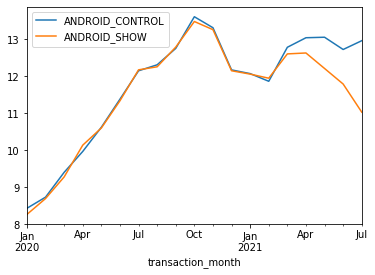

In [7]:
temp = df[
   (df['bucket'].apply(lambda x: 'ANDROID' in x))\
  ].set_index('transaction_month').groupby('bucket')
temp['avg_gmv'].plot()
# temp['avg_fusion_gmv'].plot(label='avg_fusion_gmv')
plt.legend()

In [8]:
temp = df[
   (df['bucket'].apply(lambda x: 'ANDROID_SHOW' in x))\
  ].sort_values(['transaction_month', 'bucket'])


temp['gmv_diff'] =  (temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_gmv']
temp['price_diff'] =  (temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_price']
temp['shipping_diff'] = (temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_shipping']
temp[['transaction_month','bucket','gmv_diff', 'price_diff', 'shipping_diff', 'sum_fusion_gmv']]

,transaction_month,bucket,gmv_diff,price_diff,shipping_diff,sum_fusion_gmv
44,2020-01-01,ANDROID_SHOW,-0.317273,-0.343675,-0.338902,1.896078e+05
5,2020-02-01,ANDROID_SHOW,-0.284984,-0.298091,-0.322374,1.095701e+05
86,2020-03-01,ANDROID_SHOW,-0.338845,-0.345664,-0.364085,9.653524e+04
83,2020-04-01,ANDROID_SHOW,NaN,NaN,NaN,NaN
47,2020-05-01,ANDROID_SHOW,-0.303925,-0.298518,-0.359061,1.244758e+05
82,2020-06-01,ANDROID_SHOW,-0.319838,-0.308460,-0.360617,7.036688e+05
21,2020-07-01,ANDROID_SHOW,-0.285231,-0.259155,-0.355202,1.247882e+06
7,2020-08-01,ANDROID_SHOW,-0.326027,-0.312867,-0.383161,1.149237e+06
12,2020-09-01,ANDROID_SHOW,-0.331354,-0.309920,-0.402291,1.305260e+06
34,2020-10-01,ANDROID_SHOW,-0.331211,-0.300654,-0.414857,2.027312e+06


In [9]:
temp = df[(df['bucket'].apply(lambda x: 'IOS_SHOW' in x))\
  ].sort_values(['transaction_month', 'bucket'])


temp['gmv_diff'] =  (temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_gmv']
temp['price_diff'] =  (temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_price']
temp['shipping_diff'] = (temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_shipping']
temp[['transaction_month','bucket','gmv_diff', 'price_diff', 'shipping_diff', 'sum_fusion_gmv']]

,transaction_month,bucket,gmv_diff,price_diff,shipping_diff,sum_fusion_gmv
26,2020-01-01,IOS_SHOW,-0.295776,-0.330753,-0.318036,1.300773e+05
50,2020-02-01,IOS_SHOW,-0.307851,-0.344971,-0.343985,6.835941e+04
73,2020-03-01,IOS_SHOW,-0.370058,-0.401849,-0.363007,5.355990e+04
2,2020-04-01,IOS_SHOW,NaN,NaN,NaN,NaN
37,2020-05-01,IOS_SHOW,-0.287465,-0.296061,-0.323989,7.404231e+04
42,2020-06-01,IOS_SHOW,-0.285476,-0.292617,-0.330467,4.153192e+05
23,2020-07-01,IOS_SHOW,-0.272260,-0.258223,-0.348270,7.311726e+05
90,2020-08-01,IOS_SHOW,-0.315356,-0.314471,-0.372782,6.237601e+05
45,2020-09-01,IOS_SHOW,-0.322096,-0.316815,-0.390543,6.736220e+05
40,2020-10-01,IOS_SHOW,-0.313442,-0.298640,-0.399424,1.009278e+06


In [10]:
temp = df[(df['bucket'].apply(lambda x: 'IOS_' in x))\
  ].sort_values(['transaction_month', 'bucket'])

temp[['transaction_month','bucket','avg_gmv', 'avg_fusion_gmv', 'avg_price', 'avg_shipping', 'avg_fusion_shipping', 'sum_fusion_gmv']]

,transaction_month,bucket,avg_gmv,avg_fusion_gmv,avg_price,avg_shipping,avg_fusion_shipping,sum_fusion_gmv
36,2020-01-01,IOS_CONTROL,8.330700,5.084556,5.425984,2.426303,1.315217,5.847239e+02
26,2020-01-01,IOS_SHOW,8.376496,5.898931,5.487682,2.456564,1.675289,1.300773e+05
60,2020-02-01,IOS_CONTROL,9.072947,6.558266,5.607456,2.870833,2.080930,2.820055e+02
50,2020-02-01,IOS_SHOW,8.856963,6.130339,5.471052,2.908734,1.908174,6.835941e+04
81,2020-03-01,IOS_CONTROL,10.057774,4.191967,6.081637,3.189261,1.801224,2.054064e+02
73,2020-03-01,IOS_SHOW,9.993366,6.295240,6.067021,3.222253,2.052554,5.355990e+04
16,2020-04-01,IOS_CONTROL,10.874296,NaN,6.692335,3.445062,NaN,NaN
2,2020-04-01,IOS_SHOW,10.926214,NaN,6.718423,3.469281,NaN,NaN
14,2020-05-01,IOS_CONTROL,11.385037,7.336616,7.069947,3.627826,2.756207,2.127619e+02
37,2020-05-01,IOS_SHOW,11.366646,8.099137,7.065753,3.649237,2.466924,7.404231e+04


In [ ]:
metrics:
    1. In show bucket, (avg gmv-avg fusion gmv)/avg gmv trendline
    2. In show bucket, fusion gmv /all gmv trendline
    3. Diff of avg gmv in show and control buckets 

## IOS 

Text(0.5, 1.0, 'IOS')

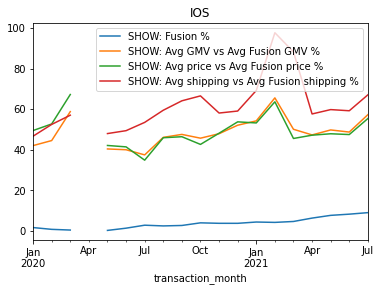

In [53]:
temp = df[
   (df['bucket'].apply(lambda x: 'IOS_' in x))\
  ].sort_values(['transaction_month', 'bucket'])

temp['fusion_gmv_pct'] = temp['sum_fusion_gmv'] / temp['sum_gmv'] * 100
temp['gmv_diff'] =  -(temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_fusion_gmv'] * 100
temp['price_diff'] =  -(temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_fusion_price']  * 100
temp['shipping_diff'] = -(temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_fusion_shipping'] * 100

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['fusion_gmv_pct'].plot(label='SHOW: Fusion %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['gmv_diff'].plot(label='SHOW: Avg GMV vs Avg Fusion GMV %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['price_diff'].plot(label='SHOW: Avg price vs Avg Fusion price %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['shipping_diff'].plot(label='SHOW: Avg shipping vs Avg Fusion shipping %')

plt.legend()
plt.title('IOS')

Text(0.5, 1.0, 'Avg GMV: Show vs Control')

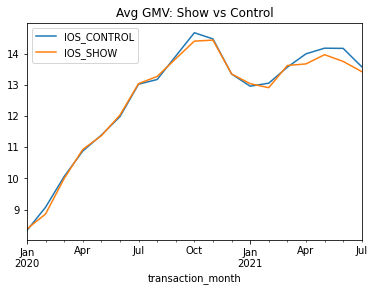

In [50]:
temp.set_index('transaction_month').groupby('bucket')['avg_gmv'].plot()
plt.legend()
plt.title('Avg GMV: Show vs Control')

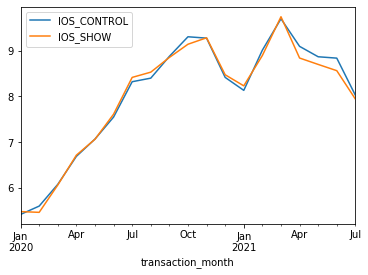

In [38]:
temp.set_index('transaction_month').groupby('bucket')['avg_price'].plot()
plt.legend()

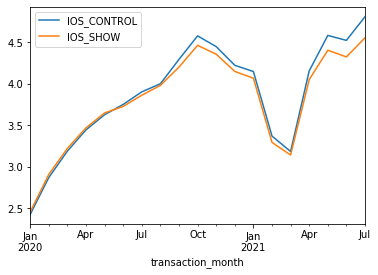

In [39]:
temp.set_index('transaction_month').groupby('bucket')['avg_shipping'].plot()
plt.legend()

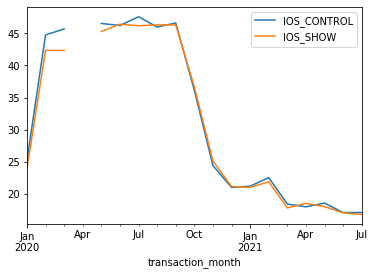

In [40]:
temp.set_index('transaction_month').groupby('bucket')['avg_fusion_min_ttd_shown'].plot()
plt.legend()


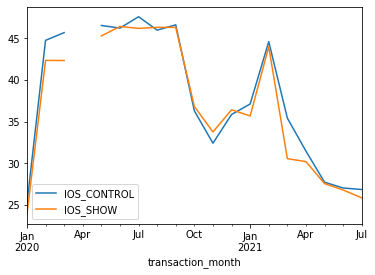

In [41]:
temp.set_index('transaction_month').groupby('bucket')['avg_fusion_max_ttd_shown'].plot()
plt.legend()

## Android

Text(0.5, 1.0, 'ANDROID')

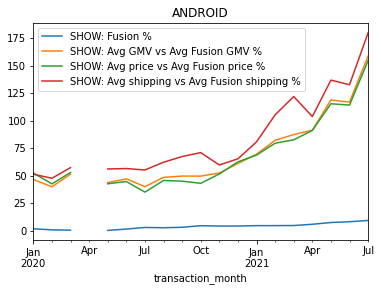

In [54]:
temp = df[
   (df['bucket'].apply(lambda x: 'ANDROID_' in x))\
  ].sort_values(['transaction_month', 'bucket'])

temp['fusion_gmv_pct'] = temp['sum_fusion_gmv'] / temp['sum_gmv'] * 100
temp['gmv_diff'] =  -(temp['avg_fusion_gmv'] - temp['avg_gmv']) / temp['avg_fusion_gmv'] * 100
temp['price_diff'] =  -(temp['avg_fusion_price'] - temp['avg_price']) / temp['avg_fusion_price']  * 100
temp['shipping_diff'] = -(temp['avg_fusion_shipping'] - temp['avg_shipping']) / temp['avg_fusion_shipping'] * 100

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['fusion_gmv_pct'].plot(label='SHOW: Fusion %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['gmv_diff'].plot(label='SHOW: Avg GMV vs Avg Fusion GMV %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['price_diff'].plot(label='SHOW: Avg price vs Avg Fusion price %')

temp[temp['bucket'].apply(lambda x: 'SHOW' in x)\
    ].set_index('transaction_month')['shipping_diff'].plot(label='SHOW: Avg shipping vs Avg Fusion shipping %')

plt.legend()
plt.title('ANDROID')

Text(0.5, 1.0, 'Avg GMV: Show vs Control')

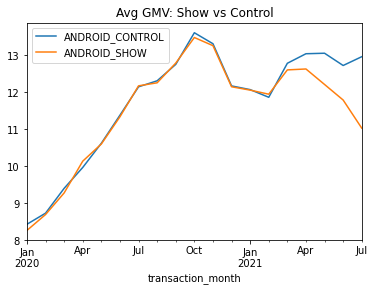

In [52]:
temp.set_index('transaction_month').groupby('bucket')['avg_gmv'].plot()
plt.legend()
plt.title('Avg GMV: Show vs Control')

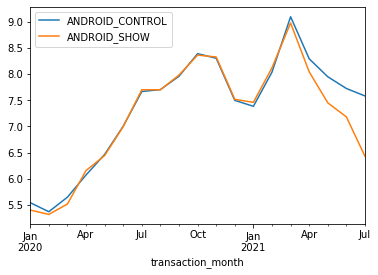

In [44]:
temp.set_index('transaction_month').groupby('bucket')['avg_price'].plot()
plt.legend()

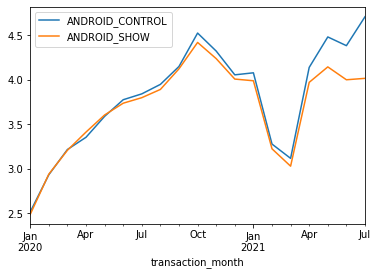

In [45]:
temp.set_index('transaction_month').groupby('bucket')['avg_shipping'].plot()
plt.legend()

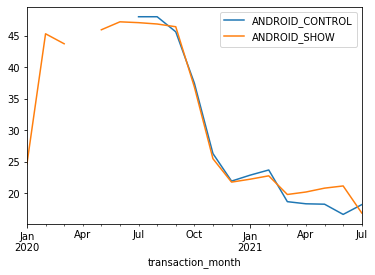

In [46]:
temp.set_index('transaction_month').groupby('bucket')['avg_fusion_min_ttd_shown'].plot()
plt.legend()


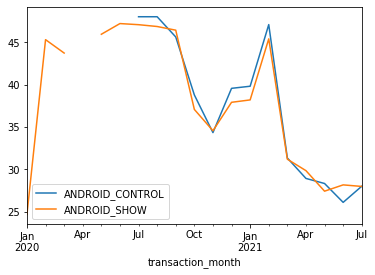

In [47]:
temp.set_index('transaction_month').groupby('bucket')['avg_fusion_max_ttd_shown'].plot()
plt.legend()


In [ ]:
Quesions
1. Why there is LTV (gmv and order) and rephurchase difference for cohorts of Jan to May 2020? 
    This is observed in DE, US, CL, FR, GB, IT, MX(not as significant)
    1.1 Hypothesis: price/shipping price/TTD of Fusion was no longer attractive to all users.
        That could not be ture, b/c if Fusion was no longer attractive to all users, 
        then the longer term LTV (e.g. 360d of cohort 2020-01) should not be incremental. 
    1.2 Hypothesis: price/shipping price/TTD of Fusion was no longer attractive to NEW users only \
        (but remain attractive to the existing users) after May 2020.
    1.3 Hypothesis: notification (push) / customer service / UI changed after 2020-05, 
        and those changes had different impact on the SHOW and CONTROL buckets. 
    1.4 Hypothesis: the cohorts are genetically different. 
        i.e., the new cohorts were less likely to be attracted by Fusion than the old ones. 
        This is very likely becuase e-commerce become more popular during the pandemic. 
        Also, change of the marketing channels could have an impact.  
        
2. Theoretically, the cohort of 2020-04 in US did not see any difference in the first 7d/30d, 
    as they could not see Fusion products. But it is not weird that they had higher LTV after 30d, 
    becuase when they returned, they could see the Fusion products.
    Similarly, there were no Fusion orders between 2020-01 to 2020-09, but the SHOW bucket is incremental in repurchase
    
Observations:
1. In the SHOW bucket, the diff between Fusion gmv/price/shipping and all kinds of orders was becoming larger.
But this does not necessarily mean the Fusion price was becoming lower. 
It just means users chose to buy products w/ lower price via Fusion.
Also, this did not begin from May 2020. 

